# Histogram

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
plt.style.use('default')

## Iris Data
> The data set is stored in ```sklearn``` as a dictionary.  
> 

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# What are the items in iris?
print('The feature names are: \n', iris['feature_names'])
print('---------------------')
print('The head of feature data: \n', iris['data'][:5,])
print('---------------------')
print('The head of target: \n', iris['target'][:5])

The feature names are: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
---------------------
The head of feature data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
---------------------
The head of target: 
 [0 0 0 0 0]


## Combine Feature and Target and Convert to DataFrame

In [5]:
# np.c_[iris['data'],iris['target']] combines feature and target more efficiently

print( iris['data'].shape )
print('---------------------')

print( iris['target'].reshape((150,1)).shape )
print('---------------------')

x = np.hstack([iris['data'],iris['target'].reshape((150,1))])
print(x[-5:])


(150, 4)
---------------------
(150, 1)
---------------------
[[6.7 3.  5.2 2.3 2. ]
 [6.3 2.5 5.  1.9 2. ]
 [6.5 3.  5.2 2.  2. ]
 [6.2 3.4 5.4 2.3 2. ]
 [5.9 3.  5.1 1.8 2. ]]


In [6]:
iris = pd.DataFrame(data=x, columns=iris['feature_names']+['species'])
iris.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
145      2.0  
146      2.0  
147      2.0  
148      2.0  
149      2.0

## Special functions in Numpy/ Pandas
> ```np.where(condition,x,y)``` returns x when conditions True & y when conditions False.  
> 'a' can be replaced by 'b' using ```replace(a,b)```.  

In [7]:
iris.species = np.where(iris.species == 0.0, 'setosa', 
                        np.where(iris.species == 1.0,'versicolor','virginica'))

iris.columns = iris.columns.str.replace(' ','') #Remove space bar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021030A85F60>,
      dtype=object)

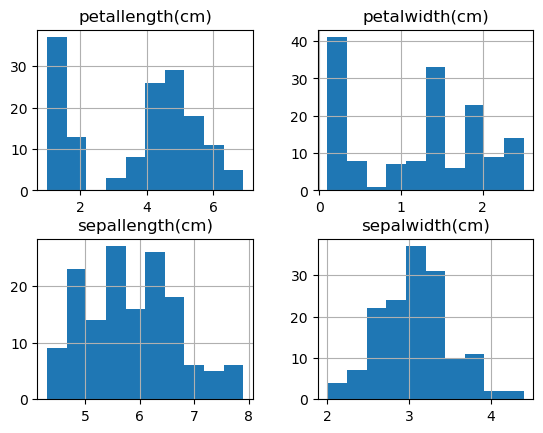

In [9]:
# Pandas plot
iris.hist()


## GDP Data

In [10]:
df = pd.read_csv("countryGDP.csv")
df.head()

Country Code  Population  GDP per Capita
0      Afghanistan  AFG  32526562.0      594.323081
1          Albania  ALB   2889167.0     3945.217582
2          Algeria  ALG  39666519.0     4206.031232
3  American Samoa*  ASA     55538.0             NaN
4          Andorra  AND     70473.0             NaN

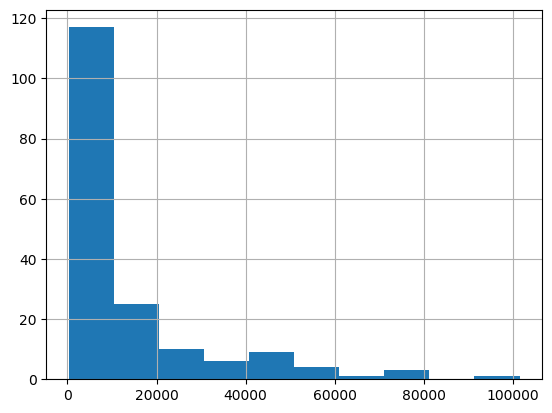

In [15]:
df1 = df['GDP per Capita'].dropna() 
df1.hist()

## Set Bins
> One way is to create a NumPy array with chosen cutting points.  
> Another way is to specify number of bins.  

In [16]:
b = np.arange(data1.min(), data1.max(), 10000) # Fixed bin size
print(b)

[   277.06830917  10277.06830917  20277.06830917  30277.06830917
  40277.06830917  50277.06830917  60277.06830917  70277.06830917
  80277.06830917  90277.06830917 100277.06830917]


Text(0, 0.5, 'Frequency')

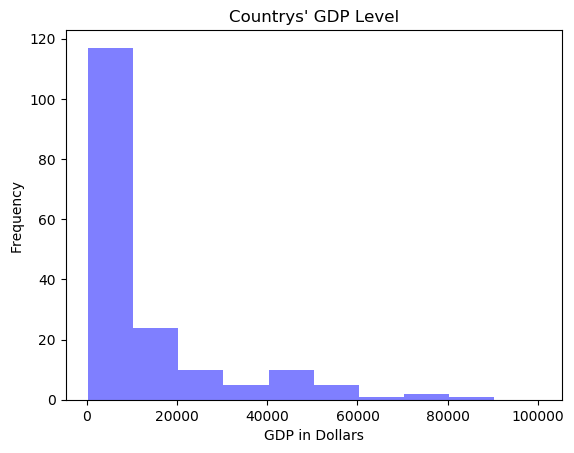

In [17]:
# Matplotlib plots

plt.hist(df1, bins=b, alpha=0.5, color='blue')
plt.title("Countrys' GDP Level")
plt.xlabel("GDP in Dollars")
plt.ylabel("Frequency")

(array([89., 28., 14., 11.,  5.,  5.,  1.,  5.,  7.,  2.,  2.,  2.,  1.,
         0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([   277.06830917,   5335.71330211,  10394.35829506,  15453.003288  ,
         20511.64828095,  25570.29327389,  30628.93826683,  35687.58325978,
         40746.22825272,  45804.87324566,  50863.51823861,  55922.16323155,
         60980.80822449,  66039.45321744,  71098.09821038,  76156.74320332,
         81215.38819627,  86274.03318921,  91332.67818215,  96391.3231751 ,
        101449.96816804]),
 <a list of 1 Patch objects>)

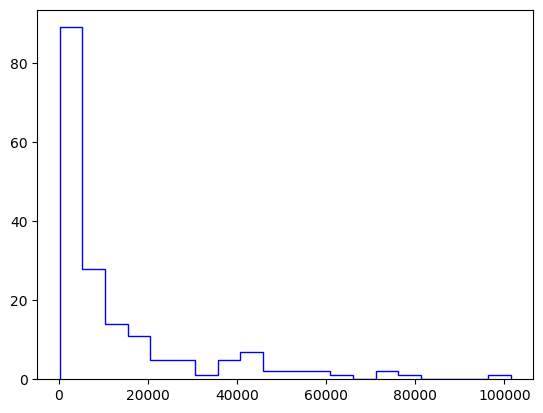

In [18]:
plt.hist(df1, bins=20, color='blue', histtype='step')

Text(0.5, 1.0, "Population Histogram ('000')")

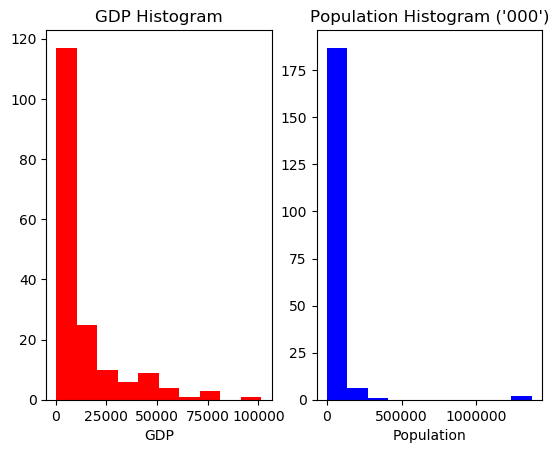

In [19]:
import matplotlib.pyplot as plt

data1 = df['GDP per Capita'].dropna() 
data2 = df['Population'].dropna()/1000 

plt.subplot(1,2,1)
plt.hist(data1, color='red')
plt.xlabel('GDP')
plt.title('GDP Histogram')

plt.subplot(1,2,2)
plt.hist(data2, color='blue')
plt.xlabel('Population')
plt.title('''Population Histogram ('000')''')

## Activity 1
> The code starts with 
```python
fig, axes = plt.subplots(1,2)
```
> Complete the plots where 1st box is GDP, 2nd box is Population.  
> Bin size is fixed at 20.  
> Set xlim for GDP to [0,75000], and for Population to [0,200000].  